## Importing Libraries

In [20]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import CountVectorizer

import string
import re

!pip install catboost

# Data Preprocessing

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
print('train shape:', train.shape)
print('test shape:', test.shape)

train shape: (7613, 5)
test shape: (3263, 4)


In [4]:
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [5]:
test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [6]:
all_data = [train, test]

## Dealing with Missing Values

In [7]:
for data in all_data:
  data.drop(["location", "id"], axis=1, inplace=True)

In [8]:
def remove_URL(text):
  url = re.compile(r'https?://\S+|www\.\S+')
  return url.sub(r'', text)


def remove_html(text):
  html = re.compile(r'<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});')
  return re.sub(html, '', text)


def remove_punct(text):
  table = str.maketrans('', '', string.punctuation)
  return text.translate(table)

In [9]:
for data in all_data:
  data['text'] = data['text'].apply(lambda x: remove_URL(x))
  data['text'] = data['text'].apply(lambda x: remove_html(x))
  data['text'] = data['text'].apply(lambda x: remove_punct(x))

## Convert Text to Vectors using Count Vectorizer

In [10]:
count_vectorizer = CountVectorizer(max_features=2000)

X = count_vectorizer.fit_transform(train["text"]).toarray()
test = count_vectorizer.transform(test["text"]).toarray()

In [11]:
y = train['target']

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

# Model

In [26]:
from sklearn import tree, linear_model, neighbors, naive_bayes, ensemble
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score

In [14]:
MLA = [
    #Ensemble Methods
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),
    
    #GLM
    linear_model.PassiveAggressiveClassifier(),
    linear_model.RidgeClassifierCV(),
    linear_model.SGDClassifier(),
    linear_model.Perceptron(),
    
    #Navies Bayes
    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),
    
    #Nearest Neighbor
    neighbors.KNeighborsClassifier(),
    
    #Trees    
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier(),

    XGBClassifier(),
    CatBoostClassifier()  
    ]

In [15]:
row_index = 0
MLA_compare = pd.DataFrame()

for classifier in MLA:
  classifier.fit(X_train, y_train)

  y_pred = classifier.predict(X_test)
  classifier_accuracy_score = accuracy_score(y_test, y_pred)

  MLA_name = classifier.__class__.__name__
  MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
  MLA_compare.loc[row_index, 'Accuracy Score'] = classifier_accuracy_score*100

  print(MLA_name, "Done")
  row_index+=1

AdaBoostClassifier Done
BaggingClassifier Done
ExtraTreesClassifier Done
GradientBoostingClassifier Done
RandomForestClassifier Done
PassiveAggressiveClassifier Done
RidgeClassifierCV Done
SGDClassifier Done
Perceptron Done
BernoulliNB Done
GaussianNB Done
KNeighborsClassifier Done
DecisionTreeClassifier Done
ExtraTreeClassifier Done
XGBClassifier Done
Learning rate set to 0.022283
0:	learn: 0.6903304	total: 60.4ms	remaining: 1m
1:	learn: 0.6870982	total: 72.6ms	remaining: 36.2s
2:	learn: 0.6849708	total: 83.2ms	remaining: 27.7s
3:	learn: 0.6825957	total: 94.2ms	remaining: 23.4s
4:	learn: 0.6801002	total: 105ms	remaining: 20.9s
5:	learn: 0.6779782	total: 116ms	remaining: 19.2s
6:	learn: 0.6755461	total: 127ms	remaining: 18s
7:	learn: 0.6734505	total: 138ms	remaining: 17.1s
8:	learn: 0.6711925	total: 148ms	remaining: 16.3s
9:	learn: 0.6695775	total: 159ms	remaining: 15.8s
10:	learn: 0.6681076	total: 173ms	remaining: 15.6s
11:	learn: 0.6663797	total: 186ms	remaining: 15.3s
12:	learn: 0.6

In [18]:
MLA_compare = MLA_compare.sort_values(by="Accuracy Score", ascending=False).reset_index(drop=True)
MLA_compare

,MLA Name,Accuracy Score
0,RidgeClassifierCV,79.645437
1,BernoulliNB,79.645437
2,RandomForestClassifier,79.382797
3,ExtraTreesClassifier,78.988838
4,CatBoostClassifier,78.660538
5,SGDClassifier,78.266579
6,GaussianNB,76.690742
7,BaggingClassifier,76.428102
8,AdaBoostClassifier,75.968483
9,GradientBoostingClassifier,75.443204


Text(0.5, 0, 'Algorithm Name')

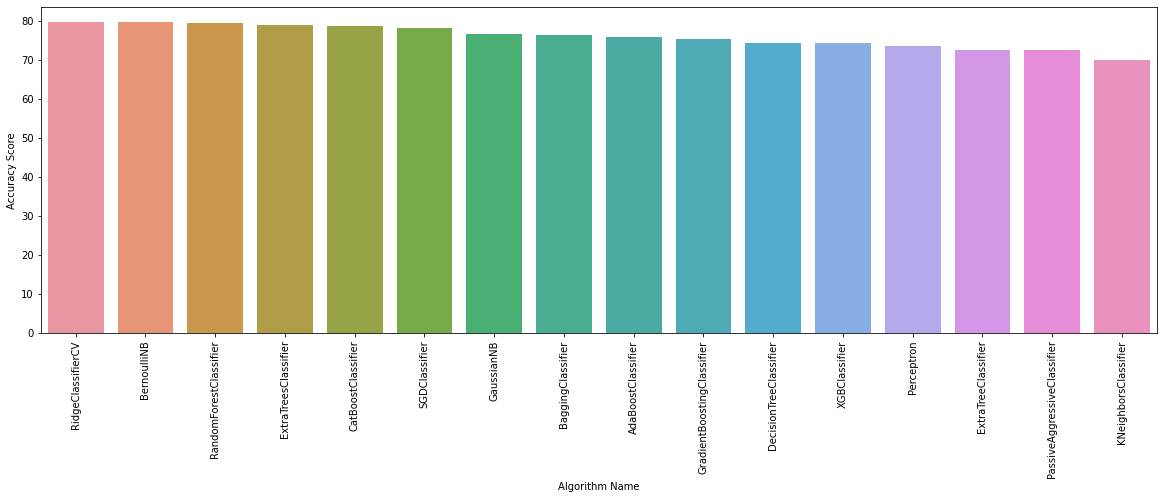

In [25]:
plt.rcParams["figure.figsize"] = (20,6)
sns.barplot(x="MLA Name", y="Accuracy Score", data = MLA_compare)
plt.xticks(rotation=90)
plt.xlabel("Algorithm Name")

## RidgeClassifierCV	

In [30]:
classifier = linear_model.RidgeClassifierCV(cv=15)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

print("Accuracy Score : ", accuracy_score(y_test, y_pred), "\n\n")
print(confusion_matrix(y_test, y_pred))

Accuracy Score :  0.7964543663821405 


[[789  97]
 [213 424]]


In [34]:
sample_submission = pd.read_csv("sample_submission.csv")
sample_submission

,id,target
0,0,0
1,2,0
2,3,0
3,9,0
4,11,0
...,...,...
3258,10861,0
3259,10865,0
3260,10868,0
3261,10874,0


In [ ]:
output = pd.DataFrame({'id': sample_submission.id, 'target': y_pred})
output.to_csv('submission.csv', index=False)